In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')


<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from math import factorial
import math
from scipy.stats import norm
from scipy import stats as st
import numpy as np

In [3]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [4]:
import warnings
warnings.simplefilter('ignore')

## Ознакомление с данными

In [5]:
data_users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')
data_calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
data_messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
data_internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
data_tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')

In [6]:
def first_glance(data): # функция для ознакомления с данными датасетов
    print(data.info())
    print()
    for i in range(len(data.columns)):
        column = data.columns[i]
        print(data[column].value_counts())
        print()

Ознакомление с данным, представленными в таблицах.

In [7]:
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [8]:
first_glance(data_users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

1024    1
1353    1
1366    1
1365    1
1364    1
       ..
1185    1
1184    1
1183    1
1182    1
1023    1
Name: user_id, Length: 500, dtype: int64

53    14
42    14
63    13
64    13
71    13
21    12
40    12
73    12
29    11
39    11
37    11
47    11
26    11
41    10
45    10
58    10
36    10
70    10
52    10
65     9
66     9
56     9
68     9
20     9
51     9
50     9
48     9
30     9
19     9
24     9
28     9
27     9

In [9]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [10]:
first_glance(data_calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

1274_248    1
1035_295    1
1377_295    1
1109_343    1
1485_49     1
           ..
1379_599    1
1454_492    1
1078_952    1
1428_53     1
1471_3      1
Name: id, Length: 202607, dtype: int64

2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05      20
2018-01-07      18
2018-01-02       9
2018-01-03       7
2018-01-01       5
Name: call_date, Length: 365, dtype: int64

0.00     39613
5.50       142
4.49       142
6.15       141
6.38       141
         ...  
26.32        1
24.51        1
27.24    

In [11]:
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [12]:
first_glance(data_messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None

1274_248     1
1045_63      1
1285_1027    1
1244_566     1
1281_213     1
            ..
1243_470     1
1385_656     1
1052_222     1
1178_126     1
1007_208     1
Name: id, Length: 123036, dtype: int64

2018-12-31    859
2018-12-30    765
2018-12-21    712
2018-12-29    702
2018-12-26    699
             ... 
2018-01-07     12
2018-01-02     10
2018-01-05     10
2018-01-04     10
2018-01-03      4
Name: message_date, Length: 364, dtype: int64

1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1111       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426

In [13]:
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [14]:
first_glance(data_internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None

0        1
88702    1
58057    1
64202    1
62155    1
        ..
58678    1
60727    1
38200    1
40249    1
2047     1
Name: Unnamed: 0, Length: 149396, dtype: int64

1274_248    1
1059_28     1
1270_78     1
1237_41     1
1092_206    1
           ..
1188_148    1
1008_43     1
1481_338    1
1294_379    1
1460_206    1
Name: id, Length: 149396, dtype: int64

0.00      19598
335.91        9
447.30        9
197.56        9
199.11        8
          ...  
182.69        1
726.03        1
315.12        1
898.99 

In [15]:
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [16]:
first_glance(data_tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None

1000    1
50      1
Name: messages_included, dtype: int64

15360    1
30720    1
Name: mb_per_month_included, dtype: int64

500     1
3000    1
Name: minutes_included, dtype: int64

1950    1
550     1
Name: rub_monthly_fee, dtype: int64

200    1
150    1
Name: rub_per_gb, dtype: int64

1    1
3    1
Name: rub_per_message, dty

### Вывод:
1. Пропущенные данные найдены только в таблице со пользователями, что свидетельствует о том, что контракт еще действует. Они не требуют обработки.
2. В таблицах со звонками, сообщениями и интернетом колонка с датой имеет формат "объект", требует изменения.
3. Все таблицы имеют общую колонку, что позволит объеденить данные.



# Подготовка данных

## Работаем со звонками

Создаем новый столбец и округляем минуты до большего значения.

In [17]:
data_calls['rounded_duration'] = np.ceil(data_calls['duration'])

In [18]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                202607 non-null  object 
 1   call_date         202607 non-null  object 
 2   duration          202607 non-null  float64
 3   user_id           202607 non-null  int64  
 4   rounded_duration  202607 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.7+ MB


Меняем формат округленных минут на целочисленный

In [19]:
data_calls['rounded_duration'] = data_calls['rounded_duration'].astype('int')

С помощью функции меняем формат даты на корректный, после чего добавляем столбец с месяцем и годом для дальнейшей работы с ним

In [20]:
def type_date(column_date): 
    column_date = pd.to_datetime(column_date, format='%Y-%m-%d')
    column_month = column_date.dt.to_period('M')
    return column_month

In [21]:
data_calls['month'] = type_date(data_calls['call_date'])

data_calls.head(3)

,id,call_date,duration,user_id,rounded_duration,month
0,1000_0,2018-07-25,0.00,1000,0,2018-07
1,1000_1,2018-08-17,0.00,1000,0,2018-08
2,1000_2,2018-06-11,2.85,1000,3,2018-06


In [22]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype    
---  ------            --------------   -----    
 0   id                202607 non-null  object   
 1   call_date         202607 non-null  object   
 2   duration          202607 non-null  float64  
 3   user_id           202607 non-null  int64    
 4   rounded_duration  202607 non-null  int64    
 5   month             202607 non-null  period[M]
dtypes: float64(1), int64(2), object(2), period[M](1)
memory usage: 9.3+ MB


Добавляем в таблицу __Звонки__ колонки __тариф__ и __город__ из таблицы __Пользователи__

In [23]:
def join_tariff(data):
    data = data.merge(data_users[['user_id','tariff','city']], on='user_id', how='left')
    return data

In [24]:
data_calls = join_tariff(data_calls)

data_calls.head(3)

,id,call_date,duration,user_id,rounded_duration,month,tariff,city
0,1000_0,2018-07-25,0.00,1000,0,2018-07,ultra,Краснодар
1,1000_1,2018-08-17,0.00,1000,0,2018-08,ultra,Краснодар
2,1000_2,2018-06-11,2.85,1000,3,2018-06,ultra,Краснодар


Добавляем в таблицу __Звонки__ колонки __включенные в тариф минуты__, __стоимость тарифа в месяц__, __стоимость минуты в тарифе__ из таблицы __Тарифы__

In [25]:
data_calls = data_calls.merge(
    data_tariffs[['tariff_name', 'minutes_included', 'rub_monthly_fee', 'rub_per_minute']],
    left_on='tariff', right_on='tariff_name', how='left'
)
data_calls.head(3)

,id,call_date,duration,user_id,rounded_duration,month,tariff,city,tariff_name,minutes_included,rub_monthly_fee,rub_per_minute
0,1000_0,2018-07-25,0.00,1000,0,2018-07,ultra,Краснодар,ultra,3000,1950,1
1,1000_1,2018-08-17,0.00,1000,0,2018-08,ultra,Краснодар,ultra,3000,1950,1
2,1000_2,2018-06-11,2.85,1000,3,2018-06,ultra,Краснодар,ultra,3000,1950,1


Создаем таблицу и считаем общую сумму минут в месяц по каждому пользователю

In [26]:
stats_calls = data_calls.pivot_table(
    index=['user_id','month', 'tariff_name', 'minutes_included', 'rub_per_minute'], 
    values='rounded_duration', aggfunc=['sum']
).reset_index()
stats_calls.head(3)

,user_id,month,tariff_name,minutes_included,rub_per_minute,sum
,,,,,,rounded_duration
0,1000,2018-05,ultra,3000,1,159
1,1000,2018-06,ultra,3000,1,172
2,1000,2018-07,ultra,3000,1,340


Создаем столбец __дополнительная плата за звонки__:
1. общая сумма минут - минуты, включенные в тариф
2. отрицательные значения меняем на "0" (значит перерасхода не было)
3. значения умножаем на стоимоть минуты сверх пакета

In [27]:
def add_payment_column(column_1, column_2): # функция принимает два столбца, вычитает из первого второй, 
    new_column = column_1 - column_2        # обнуляет значения меньше нуля
    new_column = new_column.where(new_column > 0, 0)
    return new_column

In [28]:
stats_calls['add_payment_calls'] = add_payment_column(
    stats_calls['sum']['rounded_duration'], stats_calls['minutes_included']
) * stats_calls['rub_per_minute']

stats_calls.tail(3)

,user_id,month,tariff_name,minutes_included,rub_per_minute,sum,add_payment_calls
,,,,,,rounded_duration,
3171,1499,2018-10,smart,500,3,449,0
3172,1499,2018-11,smart,500,3,612,336
3173,1499,2018-12,smart,500,3,492,0


## Работа с сообщениями

In [29]:
data_messages.head(3)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


Выделяем колонку __месяц__ для последующей компановки данных

In [30]:
# data_messages['corr_message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')

In [31]:
# data_messages['month'] = data_messages['message_date'].dt.month

In [32]:
data_messages['month'] = type_date(data_messages['message_date'])

data_messages.head(3)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,2018-06
1,1000_1,2018-10-08,1000,2018-10
2,1000_2,2018-08-04,1000,2018-08


1. В таблицу __Сообщения__ добавляем столбец __тариф__ из таблицы __Пользователи__
2. В таблицу __Сообщения__ добавляем столбцы: __кол-во сообщений, включенных в тариф, стоимость тарифа в месяц, стоимость сообщения сверх тарифа__ из таблицы __Тарифы__

In [33]:
data_messages = join_tariff(data_messages)

data_messages.head(3)

,id,message_date,user_id,month,tariff,city
0,1000_0,2018-06-27,1000,2018-06,ultra,Краснодар
1,1000_1,2018-10-08,1000,2018-10,ultra,Краснодар
2,1000_2,2018-08-04,1000,2018-08,ultra,Краснодар


In [34]:
data_messages = data_messages.merge(
    data_tariffs[['tariff_name', 'messages_included', 'rub_monthly_fee', 'rub_per_message']],
    left_on='tariff', right_on='tariff_name', how='left'
)
data_messages.head(3)

,id,message_date,user_id,month,tariff,city,tariff_name,messages_included,rub_monthly_fee,rub_per_message
0,1000_0,2018-06-27,1000,2018-06,ultra,Краснодар,ultra,1000,1950,1
1,1000_1,2018-10-08,1000,2018-10,ultra,Краснодар,ultra,1000,1950,1
2,1000_2,2018-08-04,1000,2018-08,ultra,Краснодар,ultra,1000,1950,1


Создаем таблицу с количеством сообщений в разрезе месяцев и пользователей

In [35]:
stats_messages = data_messages.pivot_table(
    index=['user_id','month','tariff_name', 'messages_included', 'rub_per_message'],
    values='message_date', aggfunc=['count']).reset_index()
stats_messages.head(3)

,user_id,month,tariff_name,messages_included,rub_per_message,count
,,,,,,message_date
0,1000,2018-05,ultra,1000,1,22
1,1000,2018-06,ultra,1000,1,60
2,1000,2018-07,ultra,1000,1,75


Создаем столбец __дополнительная плата за сообщения__:
1. общее кол-во сообщений - кол-во, включенное в тариф
2. отрицательные значения меняем на "0" (значит перерасхода не было)
3. значения умножаем на стоимоть сообщения сверх пакета

In [36]:
stats_messages['add_payment_messages'] = add_payment_column(
    stats_messages['count']['message_date'], stats_messages['messages_included']
) * stats_messages['rub_per_message']

stats_messages.tail(3)

,user_id,month,tariff_name,messages_included,rub_per_message,count,add_payment_messages
,,,,,,message_date,
2714,1499,2018-10,smart,50,3,48,0
2715,1499,2018-11,smart,50,3,59,27
2716,1499,2018-12,smart,50,3,66,48


## Работа с трафиком

In [37]:
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Cоздаем столбец с месяцем

In [38]:
data_internet['month'] = type_date(data_internet['session_date'])

data_internet.head(3)

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,2018-11
1,1,1000_1,"1,052.81",2018-09-07,1000,2018-09
2,2,1000_2,"1,197.26",2018-06-25,1000,2018-06


1. В таблицу __Интернет__ добавляем столбец __тариф__ из таблицы __Пользователи__
2. В таблицу __Интернет__ добавляем столбцы __кол-во Мб в тарифе, стоимость тарифа в месяц, стоимостьГб в рублях__ из таблицы __Тарифы__

In [39]:
data_internet = join_tariff(data_internet)
data_internet.head(3)

,Unnamed: 0,id,mb_used,session_date,user_id,month,tariff,city
0,0,1000_0,112.95,2018-11-25,1000,2018-11,ultra,Краснодар
1,1,1000_1,"1,052.81",2018-09-07,1000,2018-09,ultra,Краснодар
2,2,1000_2,"1,197.26",2018-06-25,1000,2018-06,ultra,Краснодар


In [40]:
data_internet = data_internet.merge(
    data_tariffs[['tariff_name', 'mb_per_month_included', 'rub_monthly_fee', 'rub_per_gb']],
    left_on='tariff', right_on='tariff_name', how='left'
)
data_internet.head(3)

,Unnamed: 0,id,mb_used,session_date,user_id,month,tariff,city,tariff_name,mb_per_month_included,rub_monthly_fee,rub_per_gb
0,0,1000_0,112.95,2018-11-25,1000,2018-11,ultra,Краснодар,ultra,30720,1950,150
1,1,1000_1,"1,052.81",2018-09-07,1000,2018-09,ultra,Краснодар,ultra,30720,1950,150
2,2,1000_2,"1,197.26",2018-06-25,1000,2018-06,ultra,Краснодар,ultra,30720,1950,150


1. Создаем таблицу с количеством израсходованных Мб в разрезе месяцев и пользователей
2. Добавляем столбец с округленным кол-вом Мб согласно условиям тарифа

In [41]:
stats_internet = data_internet.pivot_table(
    index=['user_id','month','tariff_name', 'mb_per_month_included', 'rub_per_gb', 'rub_monthly_fee', 'city'],
    values='mb_used', aggfunc=['sum']).reset_index()
stats_internet.head(3)

,user_id,month,tariff_name,mb_per_month_included,rub_per_gb,rub_monthly_fee,city,sum
,,,,,,,,mb_used
0,1000,2018-05,ultra,30720,150,1950,Краснодар,"2,253.49"
1,1000,2018-06,ultra,30720,150,1950,Краснодар,"23,233.77"
2,1000,2018-07,ultra,30720,150,1950,Краснодар,"14,003.64"


In [42]:
stats_internet['rounded_mb_used'] = np.ceil(stats_internet['sum']['mb_used'] / 1024) * 1024
stats_internet.head(3)

,user_id,month,tariff_name,mb_per_month_included,rub_per_gb,rub_monthly_fee,city,sum,rounded_mb_used
,,,,,,,,mb_used,
0,1000,2018-05,ultra,30720,150,1950,Краснодар,"2,253.49","3,072.00"
1,1000,2018-06,ultra,30720,150,1950,Краснодар,"23,233.77","23,552.00"
2,1000,2018-07,ultra,30720,150,1950,Краснодар,"14,003.64","14,336.00"


Создаем столбец __дополнительная плата за трафик__:
1. общее кол-во Мб - кол-во, включенное в тариф
2. отрицательные значения меняем на "0" (значит перерасхода не было)
3. значения переводим в Гб и умножаем на стоимоть Гб сверх пакета
4. отрицательные значения вновь меняем на "0"

In [43]:
stats_internet['add_payment_internet'] = (add_payment_column(
    stats_internet['rounded_mb_used'], stats_internet['mb_per_month_included']
) / 1024) * stats_internet['rub_per_gb']

stats_internet.tail(3)

,user_id,month,tariff_name,mb_per_month_included,rub_per_gb,rub_monthly_fee,city,sum,rounded_mb_used,add_payment_internet
,,,,,,,,mb_used,,
3200,1499,2018-10,smart,15360,200,550,Пермь,"17,788.51","18,432.00",600.00
3201,1499,2018-11,smart,15360,200,550,Пермь,"17,963.31","18,432.00",600.00
3202,1499,2018-12,smart,15360,200,550,Пермь,"13,055.58","13,312.00",0.00


## Всего выручка

Создаем таблицу с общими расходами сверх лимитов тарифов:

1.1 из статистической таблицы _интернет_ добавляем столбцы __месяц; имя тарифа; плата за мегабайт сверх лимита__

1.2 из статистической таблицы _звонки_ добавляем столбец __плата за звонки сверх лимита; месяная плата за тариф; город пользователя__

2. из статистической таблицы _сообщений_ добавляем столбец __плата за сообщения сверх лимита__


In [44]:
data_total = stats_internet[
    ['user_id', 'month', 'tariff_name', 'add_payment_internet','rub_monthly_fee','city']
].merge(
    stats_calls[['user_id', 'month', 'add_payment_calls']], 
    on=['user_id', 'month'], how='left'
)

data_total.head(3)

,user_id,month,tariff_name,add_payment_internet,rub_monthly_fee,city,add_payment_calls
,,,,,,,
0,1000,2018-05,ultra,0.00,1950,Краснодар,0.00
1,1000,2018-06,ultra,0.00,1950,Краснодар,0.00
2,1000,2018-07,ultra,0.00,1950,Краснодар,0.00


In [45]:
data_total = data_total.merge(
    stats_messages[['user_id', 'month', 'add_payment_messages']], on=['user_id', 'month'], how='left'
)

data_total.head(3)

,user_id,month,tariff_name,add_payment_internet,rub_monthly_fee,city,add_payment_calls,add_payment_messages
,,,,,,,,
0,1000,2018-05,ultra,0.00,1950,Краснодар,0.00,0.00
1,1000,2018-06,ultra,0.00,1950,Краснодар,0.00,0.00
2,1000,2018-07,ultra,0.00,1950,Краснодар,0.00,0.00


In [46]:
data_total.user_id.nunique()

497

1. Проверяем на наличие пропусков
2. Пропуски появились при объединении таблиц, так как кол-во записей в таблицах разное. Объединяли путем добавления в таблицу, где больше всего записей (статистическая таблица _интернет_) с использованием 'left'
3. В столбцах __ст-ть сверх пакета звонков__ и __ст-ть сверх пакета сообщений__ заменяем пропуски на ноль для возможности корректной работы с данными

In [47]:
data_total.isna().sum()

user_id                     0
month                       0
tariff_name                 0
add_payment_internet        0
rub_monthly_fee             0
city                        0
add_payment_calls          40
add_payment_messages      497
dtype: int64

In [48]:
data_total['add_payment_calls'] = data_total['add_payment_calls'].fillna(0)

In [49]:
data_total['add_payment_messages'] = data_total['add_payment_messages'].fillna(0)

1. Создаем столбец всего плата сверх пакета (звонки + минуты + трафик)
2. Создаем столбец выручка (месячная плата + плата сверх пакета)
3. Проверяем данные по таблице

In [50]:
data_total['add_payment_total'] = (
    data_total['add_payment_calls'] 
    + data_total['add_payment_messages']
    + data_total['add_payment_internet']
)

In [51]:
data_total['revenue'] = data_total['rub_monthly_fee'] + data_total['add_payment_total']

data_total.tail(3)

,user_id,month,tariff_name,add_payment_internet,rub_monthly_fee,city,add_payment_calls,add_payment_messages,add_payment_total,revenue
,,,,,,,,,,
3200,1499,2018-10,smart,600.00,550,Пермь,0.00,0.00,600.00,"1,150.00"
3201,1499,2018-11,smart,600.00,550,Пермь,336.00,27.00,963.00,"1,513.00"
3202,1499,2018-12,smart,0.00,550,Пермь,0.00,48.00,48.00,598.00


In [52]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype    
---  ------                    --------------  -----    
 0   (user_id, )               3203 non-null   int64    
 1   (month, )                 3203 non-null   period[M]
 2   (tariff_name, )           3203 non-null   object   
 3   (add_payment_internet, )  3203 non-null   float64  
 4   (rub_monthly_fee, )       3203 non-null   int64    
 5   (city, )                  3203 non-null   object   
 6   (add_payment_calls, )     3203 non-null   float64  
 7   (add_payment_messages, )  3203 non-null   float64  
 8   (add_payment_total, )     3203 non-null   float64  
 9   (revenue, )               3203 non-null   float64  
dtypes: float64(5), int64(2), object(2), period[M](1)
memory usage: 275.3+ KB


# Анализ данных

## Звонки

In [53]:
stats_calls.pivot_table(index='tariff_name', values=['sum','add_payment_calls'], aggfunc='mean')

,add_payment_calls,sum
,,rounded_duration
tariff_name,,
smart,125.15,419.06
ultra,0.00,545.45


Формируем срезы по тарифам

In [54]:
stats_smart = stats_calls.loc[stats_calls['tariff_name'] == "smart"]

In [55]:
stats_ultra = stats_calls.loc[stats_calls['tariff_name'] == "ultra"]

Пользователи тарифа Смарт чаще всего проговаривают от 350 до 550 минут в месяц

array([[<AxesSubplot:title={'center':"('sum', 'rounded_duration')"}>]],
      dtype=object)

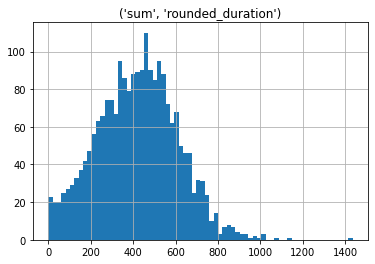

In [56]:
stats_smart.hist('sum', bins=70) # количество потраченных минут в месяц тариф Смарт

In [57]:
stats_smart['sum'].value_counts().head(5)

rounded_duration
437                 10
348                  9
532                  9
290                  9
401                  9
dtype: int64

Пользователи тарифа Ультра чаще всего проговаривают от 500 до 700 минут в месяц

array([[<AxesSubplot:title={'center':"('sum', 'rounded_duration')"}>]],
      dtype=object)

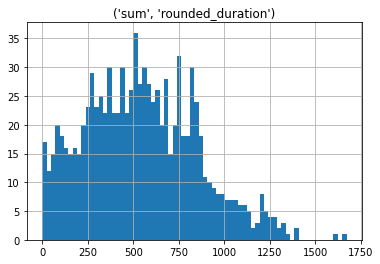

In [58]:
stats_ultra.hist('sum', bins=70) # количество потраченных минут в месяц тариф Ультра

In [59]:
stats_ultra['sum'].value_counts().head()

rounded_duration
567                 5
813                 5
368                 5
0                   4
627                 4
dtype: int64

На тарифе Смарт свыше 935 минут в месяц считается выбросами и встречается крайне редко

<function matplotlib.pyplot.show(close=None, block=None)>

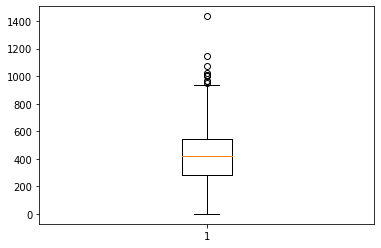

In [60]:
plt.boxplot(stats_smart['sum']['rounded_duration'])
plt.show

In [61]:
stats_smart['sum']['rounded_duration'].describe()

count   2,223.00
mean      419.06
std       189.33
min         0.00
25%       285.00
50%       423.00
75%       545.50
max     1,435.00
Name: rounded_duration, dtype: float64

Для тарифа Ультра значения свыше 1425 минут в месяц считаются выбросами, так как встречаются крайне редко

<function matplotlib.pyplot.show(close=None, block=None)>

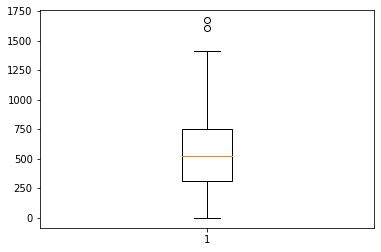

In [62]:
plt.boxplot(stats_ultra['sum']['rounded_duration'])
plt.show

In [63]:
stats_ultra['sum']['rounded_duration'].describe()

count     951.00
mean      545.45
std       306.93
min         0.00
25%       310.00
50%       528.00
75%       756.50
max     1,673.00
Name: rounded_duration, dtype: float64

Количество затраченных минут на тарифе Смарт нормально распеределено вокруг среднего 419 минут

<AxesSubplot:ylabel='Density'>

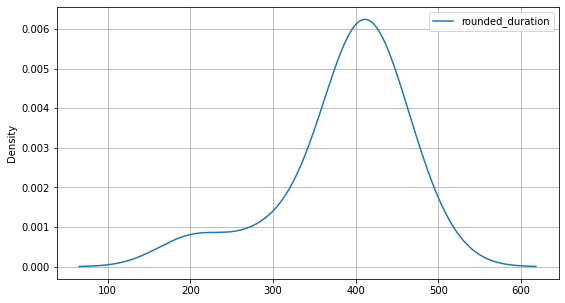

In [64]:
stats_smart.pivot_table(index='month', values='sum', aggfunc='mean').plot(kind='kde', grid=True, figsize=(9, 5))

In [65]:
variance_calls_smart = np.var(stats_smart['sum'], ddof=1)
variance_calls_smart

rounded_duration   35,844.19
dtype: float64

In [66]:
std_dev_calls_smart = np.sqrt(variance_calls_smart)
std_dev_calls_smart

rounded_duration   189.33
dtype: float64

Количество затраченных минут на тарифе Ультра нормально распеределено вокруг среднего 545 минут

<AxesSubplot:ylabel='Density'>

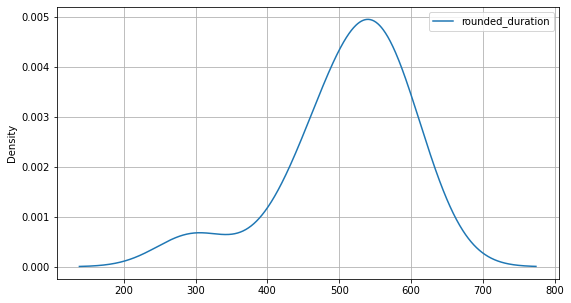

In [67]:
stats_ultra.pivot_table(index='month', values='sum', aggfunc='mean').plot(kind='kde', grid=True, figsize=(9, 5))

In [68]:
variance_calls_ultra = np.var(stats_ultra['sum'], ddof=1)
variance_calls_ultra

rounded_duration   94,203.42
dtype: float64

In [69]:
std_dev_calls_ultra = np.sqrt(variance_calls_ultra)
std_dev_calls_ultra

rounded_duration   306.93
dtype: float64

## Сообщения

In [70]:
stats_messages.pivot_table(index='tariff_name', values=['count', 'add_payment_messages'], aggfunc='mean')

,add_payment_messages,count
,,message_date
tariff_name,,
smart,20.18,38.72
ultra,0.00,61.16


Делаем срез данным по Тарифам

In [71]:
smart_messages = stats_messages.loc[stats_messages['tariff_name'] == "smart"]

In [72]:
ultra_messages = stats_messages.loc[stats_messages['tariff_name'] == "ultra"]

__Тариф Смарт__

array([[<AxesSubplot:title={'center':'message_date'}>]], dtype=object)

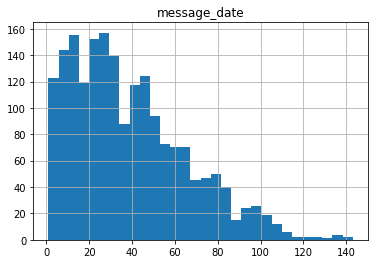

In [73]:
smart_messages['count'].hist(bins=30) # количество отправленных сообщений в месяц тариф Смарт

In [74]:
smart_messages['count'].value_counts().head()

message_date
20              39
16              38
13              37
14              36
25              35
dtype: int64

Пользователи тарифа Смарт крайне редко отправляют более 112 сообщений в месяц

<function matplotlib.pyplot.show(close=None, block=None)>

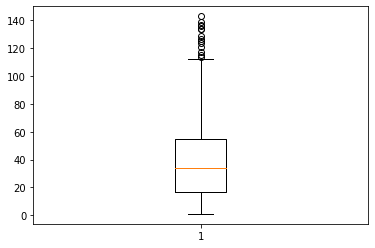

In [75]:
plt.boxplot(smart_messages['count'])
plt.show

In [76]:
smart_messages['count'].describe()

,message_date
count,"1,922.00"
mean,38.72
std,26.79
min,1.00
25%,17.00
50%,34.00
75%,55.00
max,143.00


Количество сообщений в месяц нормально распределено вокруг среднего в 39 сообщений

<AxesSubplot:ylabel='Density'>

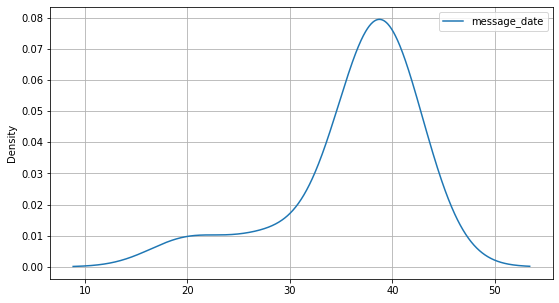

In [77]:
smart_messages.pivot_table(index='month', values='count', aggfunc='mean').plot(kind='kde', grid=True, figsize=(9, 5))

In [78]:
variance_messages_smart = np.var(smart_messages['count'], ddof=1)
variance_messages_smart

message_date   717.59
dtype: float64

In [79]:
std_dev_messages_smart = np.sqrt(variance_messages_smart)
std_dev_messages_smart

message_date   26.79
dtype: float64

__Тариф Ультра__

array([[<AxesSubplot:title={'center':'message_date'}>]], dtype=object)

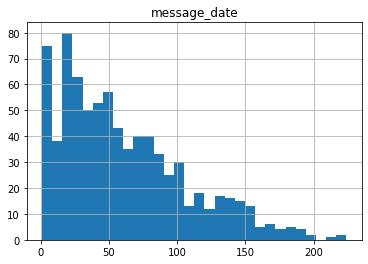

In [80]:
ultra_messages['count'].hist(bins=30) # количество отправленных сообщений в месяц тариф Ультра

In [81]:
ultra_messages['count'].value_counts().head()

message_date
20              13
6               13
40              13
18              12
17              12
dtype: int64

Пользователи тарифа Ультра крайне редко отправляют более 183 сообщений в месяц. А максимальное количество отправленных в месяц сообщений равняетя 224. При включенных в тариф Ультра 1000 сообщений в месяц.

<function matplotlib.pyplot.show(close=None, block=None)>

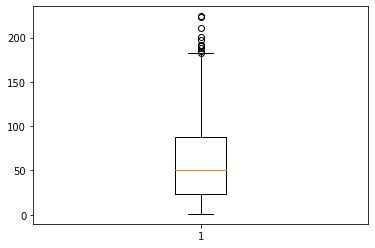

In [82]:
plt.boxplot(ultra_messages['count'])
plt.show

In [83]:
ultra_messages['count'].describe()

,message_date
count,795.00
mean,61.16
std,45.93
min,1.00
25%,24.00
50%,51.00
75%,87.50
max,224.00


<AxesSubplot:ylabel='Density'>

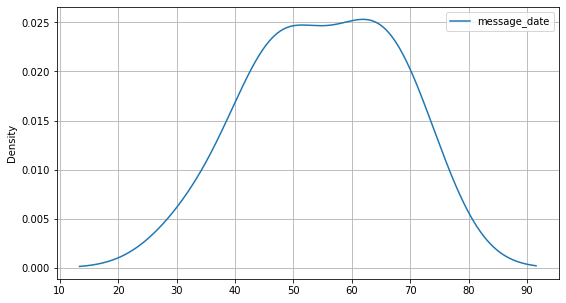

In [84]:
ultra_messages.pivot_table(index='month', values='count', aggfunc='mean').plot(kind='kde', grid=True, figsize=(9, 5))

In [85]:
variance_messages_ultra = np.var(ultra_messages['count'], ddof=1)
variance_messages_ultra

message_date   2,109.66
dtype: float64

In [86]:
std_dev_messages_ultra = np.sqrt(variance_messages_ultra)
std_dev_messages_ultra

message_date   45.93
dtype: float64

## Интернет трафик

In [87]:
stats_internet.pivot_table(index='tariff_name', values=['rounded_mb_used','add_payment_internet'], aggfunc='mean')

,add_payment_internet,rounded_mb_used
,,
tariff_name,,
smart,598.03,"16,728.24"
ultra,121.38,"20,167.02"


Делаем срез по тарифам

In [88]:
internet_smart = stats_internet.loc[stats_internet['tariff_name'] == "smart"]

In [89]:
internet_ultra = stats_internet.loc[stats_internet['tariff_name'] == "ultra"]

__Тариф Смарт__

Пользователи тарифа Смарт чаще всего в месяц тратят от 15 до 20 Гб в месяц

array([[<AxesSubplot:title={'center':'mb_used'}>]], dtype=object)

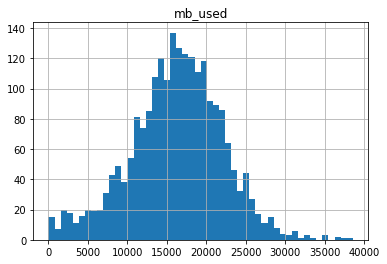

In [90]:
internet_smart['sum'].hist(bins=50) # количество использованного траффика в МБ в месяц тариф Смарт

In [91]:
internet_smart['sum'].value_counts().head()

mb_used  
0.00         1
18,837.98    1
18,802.13    1
18,806.02    1
18,811.52    1
dtype: int64

Пользователи тарифа Смарт крайне редко используют более 31 Гб траффика в месяц

<function matplotlib.pyplot.show(close=None, block=None)>

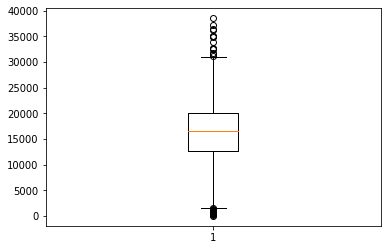

In [92]:
plt.boxplot(internet_smart['sum'])
plt.show

In [93]:
internet_smart['sum'].describe()

,mb_used
count,"2,228.00"
mean,"16,215.66"
std,"5,861.74"
min,0.00
25%,"12,649.27"
50%,"16,507.74"
75%,"20,043.79"
max,"38,552.45"


Количество сообщений в месяц нормально распределено вокруг среднего в 16 Гб

<AxesSubplot:ylabel='Density'>

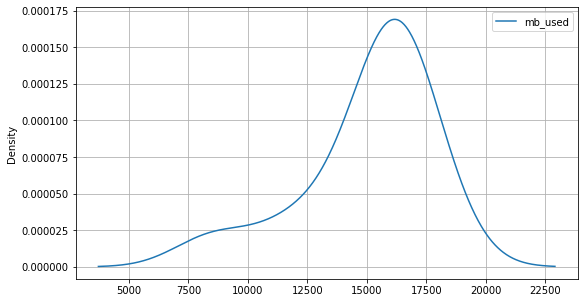

In [94]:
internet_smart.pivot_table(index='month', values='sum', aggfunc='mean').plot(kind='kde', grid=True, figsize=(9, 5))

In [95]:
variance_internet_smart = np.var(internet_smart['sum'], ddof=1)
variance_internet_smart

mb_used   34,359,951.68
dtype: float64

In [96]:
std_dev_internet_smart = np.sqrt(variance_internet_smart)
std_dev_internet_smart

mb_used   5,861.74
dtype: float64

__Тариф Ультра__

Пользователи тарифа Смарт чаще всего в месяц тратят от 15 до 20 Гб в месяц

array([[<AxesSubplot:title={'center':'mb_used'}>]], dtype=object)

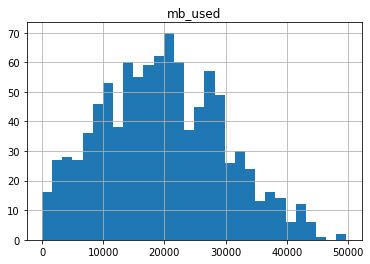

In [97]:
internet_ultra['sum'].hist(bins=30) # количество использованного траффика в МБ в месяц тариф Ультра

In [98]:
internet_ultra['sum'].value_counts().head()

mb_used  
0.00         1
24,622.91    1
23,422.76    1
23,426.76    1
23,449.02    1
dtype: int64

Пользователи тарифа Смарт крайне редко используют более 50 Гб траффика в месяц

<function matplotlib.pyplot.show(close=None, block=None)>

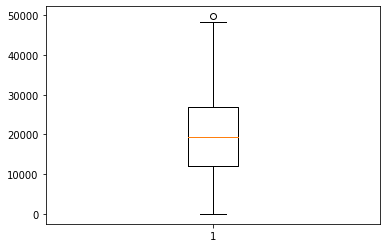

In [99]:
plt.boxplot(internet_ultra['sum'])
plt.show

In [100]:
internet_ultra['sum'].describe()

,mb_used
count,975.00
mean,"19,668.49"
std,"9,943.05"
min,0.00
25%,"12,008.31"
50%,"19,394.29"
75%,"26,896.55"
max,"49,745.69"


Количество сообщений в месяц нормально распределено вокруг среднего в 19 Гб

<AxesSubplot:ylabel='Density'>

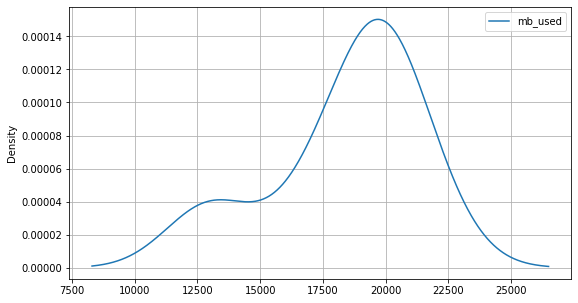

In [101]:
internet_ultra.pivot_table(index='month', values='sum', aggfunc='mean').plot(kind='kde', grid=True, figsize=(9, 5))

In [102]:
variance_internet_ultra = np.var(internet_ultra['sum'], ddof=1)
variance_internet_ultra

mb_used   98,864,248.95
dtype: float64

In [103]:
std_dev_internet_ultra = np.sqrt(variance_internet_ultra)
std_dev_internet_ultra

mb_used   9,943.05
dtype: float64

## Общее

Средняя оплата в рублях сверх пакетов услуг в разрезе месяцев. Так как тариф Ультра включает более расширенные пакеты услуг, доплата за услуги в месяц у пользователей этого тарифа значительно меньше, чем у пользователей тарифа Смарт.

In [104]:
data_total.groupby(['tariff_name','month'])['add_payment_total'].mean()

tariff_name  month  
smart        2018-01     171.32
             2018-02     277.60
             2018-03     614.62
             2018-04     413.09
             2018-05     647.51
             2018-06     654.02
             2018-07     673.95
             2018-08     773.89
             2018-09     699.95
             2018-10     814.85
             2018-11     793.05
             2018-12   1,028.53
ultra        2018-01       0.00
             2018-02      27.27
             2018-03      64.86
             2018-04      51.82
             2018-05     111.36
             2018-06      90.36
             2018-07     170.00
             2018-08     134.43
             2018-09      75.00
             2018-10     116.80
             2018-11     143.23
             2018-12     190.22
Name: add_payment_total, dtype: float64

Средняя выручка в месяц в разрезе тарифов. Несмотря на доплаты сверх пакетов услуг, пользователи тарифа Смарт ежемесячно тратят меньше средств на сотового оператора.

In [105]:
data_total.groupby(['tariff_name','month'])['revenue'].mean()

tariff_name  month  
smart        2018-01     721.32
             2018-02     827.60
             2018-03   1,164.62
             2018-04     963.09
             2018-05   1,197.51
             2018-06   1,204.02
             2018-07   1,223.95
             2018-08   1,323.89
             2018-09   1,249.95
             2018-10   1,364.85
             2018-11   1,343.05
             2018-12   1,578.53
ultra        2018-01   1,950.00
             2018-02   1,977.27
             2018-03   2,014.86
             2018-04   2,001.82
             2018-05   2,061.36
             2018-06   2,040.36
             2018-07   2,120.00
             2018-08   2,084.43
             2018-09   2,025.00
             2018-10   2,066.80
             2018-11   2,093.23
             2018-12   2,140.22
Name: revenue, dtype: float64

Делаем срезы с тарифами Ультра и Смарт.

In [106]:
ultra = data_total[data_total['tariff_name'] == 'ultra']

In [107]:
smart = data_total[data_total['tariff_name'] == 'smart']

Распределение расходов сверх лимита услуг тарифа

<AxesSubplot:ylabel='Density'>

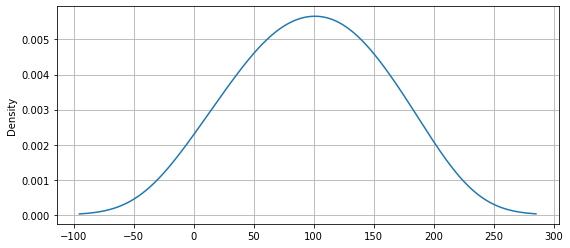

In [108]:
ultra.groupby('month')['add_payment_total'].mean().plot(grid=True, figsize=(9, 4), kind='kde')

<AxesSubplot:ylabel='Density'>

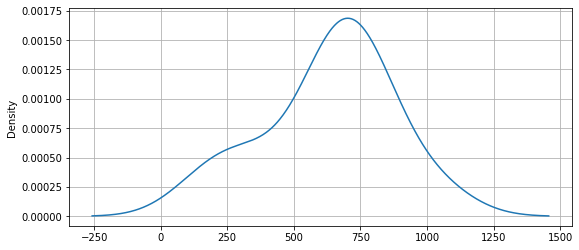

In [109]:
smart.groupby('month')['add_payment_total'].mean().plot(grid=True, figsize=(9, 4), kind='kde')

Распределение выручки 

<AxesSubplot:ylabel='Density'>

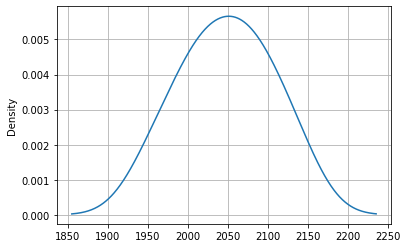

In [110]:
ultra.groupby('month')['revenue'].mean().plot(grid=True, kind='kde')

<AxesSubplot:ylabel='Density'>

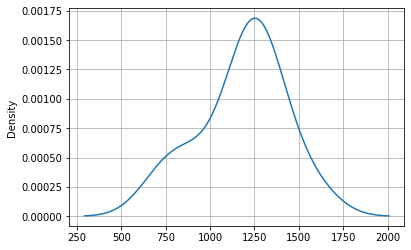

In [111]:
smart.groupby('month')['revenue'].mean().plot(grid=True, kind='kde') # 

# Проверка гипотез

## Гипотеза № 1 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Нулевая гипотеза утверждает о равенстве средней выручки обоих тарифов, тогда Гипотеза альтернативная гипотеза будет свидетельствовать об обратном.

Н0: средняя выручка Ультра = средняя выручка Смарт

Н1: ср. выручки двух тарифов не равны

Р-уровень значимости = 0.05

Дисперсия выборок значительно отличается, поэтому параметр _equal_val_ установили как _False_

In [112]:
variance_revenue_ultra = np.var(ultra['revenue'], ddof=1)
variance_revenue_ultra

142819.9494550624

In [113]:
variance_revenue_smart = np.var(smart['revenue'], ddof=1)
variance_revenue_smart

669840.4808481111

Распределение выборки - выручка по тарифу Ультра нормальное.

Распределение выборки - выручка по тарифу Смарт тоже нормальное, но имеет пололжительную скошенность (вправо), это означает, что медиана < среднего значения.

<AxesSubplot:ylabel='Density'>

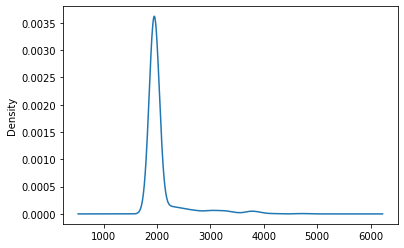

In [114]:
ultra['revenue'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

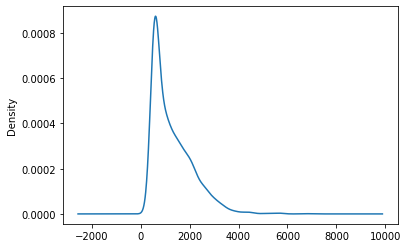

In [115]:
smart['revenue'].plot(kind='kde')

In [116]:
print(ultra['revenue'].describe())
print()
print(smart['revenue'].describe())

count     975.00
mean    2,071.38
std       377.92
min     1,950.00
25%     1,950.00
50%     1,950.00
75%     1,950.00
max     4,800.00
Name: revenue, dtype: float64

count   2,228.00
mean    1,290.31
std       818.44
min       550.00
25%       550.00
50%     1,026.50
75%     1,750.00
max     6,770.00
Name: revenue, dtype: float64


In [117]:
alpha = 0.05
results_1 = st.ttest_ind(ultra['revenue'], smart['revenue'], equal_var=False)
print(f'p-значение: {results_1.pvalue}')
if results_1.pvalue < alpha:
    print(f"Отвергаем Н0")
else:
    print(f'Не получилось отвергнуть Н0')

p-значение: 5.22403940028982e-249
Отвергаем Н0


Для проверки гипотезы о равенстве средних значений двух выборок изпользовали тест Стьюдента. Нулевая гипотеза была отвергнута, так как p-значение, полученное в тесте, много меньше уровня значимости, установленного в 5%, что свидетельствует об очень низкой вероятности того, что среднее значение этих выборок равны, что наглядно видно по значению среднего по каждой выборке ('2071 != 1291')

## Гипотеза № 2 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Нулева гипотеза утверждает о равенстве средней выручки пользователей из Москвы и других регионов, альтернативная гипотеза свидетельствует об обратном.

Н0: средняя выручка из Москвы = средняя выручка из остальных регионов

Н1: ср. выручки из Москвы и других регионов не равны

Р-уровень значимости = 0.05

1. Проверяем уникальность значений в столбце __город__
2. Формируем массив данных с выручкой пользователей из Москвы
3. Формируем массив данных с выручкой пользователей из остальных городов

In [118]:
data_total['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [119]:
capital = data_total[data_total['city'] == "Москва"]['revenue']

In [120]:
others = data_total[data_total['city'] != "Москва"]['revenue']

Дисперсия выборок не значительно отличается, поэтому параметр _equal_val_ установили как _True_

In [121]:
variance_revenue_capital = np.var(capital, ddof=1)
variance_revenue_capital

565636.467011886

In [122]:
variance_revenue_others = np.var(others, ddof=1)
variance_revenue_others

655848.968318485

<AxesSubplot:ylabel='Density'>

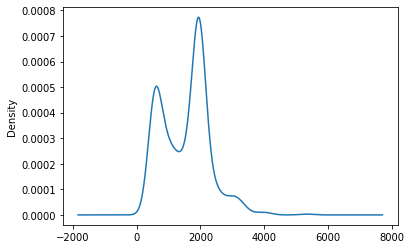

In [123]:
capital.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

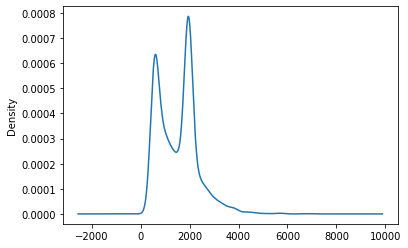

In [124]:
others.plot(kind='kde')

In [125]:
alpha = 0.05
results_2 = st.ttest_ind(capital, others, equal_var=True)
print(f'p-значение: {results_2.pvalue}')
if results_2.pvalue < alpha:
    print(f"Отвергаем Н0")
else:
    print(f'Не получилось отвергнуть Н0')

p-значение: 0.521500152176397
Не получилось отвергнуть Н0


In [126]:
print(capital.describe())
print()
print(others.describe())

count     611.00
mean    1,546.71
std       752.09
min       550.00
25%       780.50
50%     1,750.00
75%     1,950.00
max     5,321.00
Name: revenue, dtype: float64

count   2,592.00
mean    1,523.67
std       809.85
min       550.00
25%       750.00
50%     1,575.00
75%     1,950.00
max     6,770.00
Name: revenue, dtype: float64


In [127]:
stats_others = data_total[data_total['city'] != "Москва"]
stats_capital = data_total[data_total['city'] == "Москва"]

<AxesSubplot:ylabel='Density'>

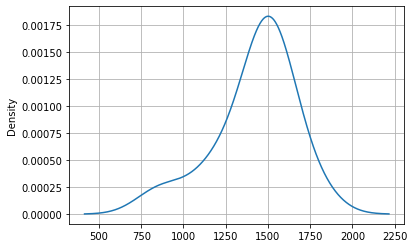

In [128]:
stats_others.groupby('month')['revenue'].mean().plot(grid=True, kind='kde')

<AxesSubplot:ylabel='Density'>

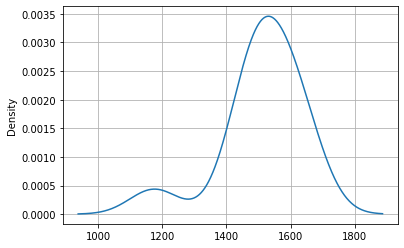

In [129]:
stats_capital.groupby('month')['revenue'].mean().plot(grid=True, kind='kde')

Для проверки гипотезы о равенстве средних значений двух выборок изпользовали тест Стьюдента. Отвергнуть нулевую гипотезу не получилось, так как p-значение, полученное в тесте, много больше уровня значимости, установленного в 5%.

# Общий вывод

1. Получены следующие таблицы: users, calls, messages, internet, tariffs.

    Данные без каких-либо серьезных недочетов, только формат даты некорректен, но приведен в нужный для анализа формат.
2. Для таблиц calls, messages, internet были посчитана стоимость доплаты сверх лимита, установленного тарифом и получена общая сумма в разрезе каждого пользователя помесячно.
    Также посчитана вычислена вырука в месяц по каждому пользователю.
3. Проанализированны данные звонков, сообщений и траффика, вычислены средние значения, дисперсия и стандартное отклонение.
4. Проверены гипотезы статистическим тестом Стьюдента:
- "_средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются_"

    сделаны выводы, что действительно различаются, так как р-значение сильно меньше уровня значимости в 5% (5.22 * 10**(-249))
    


- "_средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов_"

    сделаны выводы, что среднее значение выручки от пользователей в Москве и других регионах не отличается, так как р-значение (52%) сильно больше уровня значимости в 5% 
